<a href="https://colab.research.google.com/github/matusoff/ML_models/blob/main/ImageAnalysis_TF_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML to classify images

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
# Load data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
# Data types
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
# Get the shape of the arrays
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)
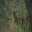

In [4]:
# Take a look on the first image as an array
index = 10
x_train[index]

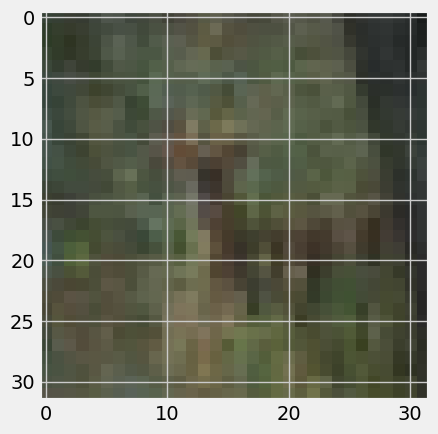

In [5]:
# Show image as a picture
img = plt.imshow(x_train[index])

In [6]:
# Get the image label
print('The image label is:', y_train[index])

The image label is: [4]


In [7]:
# Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'frog', 'horse', 'ship', 'truck']

#prit the image class
print('The image class is: ', classification[y_train[index][0]])

The image class is:  deer


In [8]:
# Convert the labels into a set of 10 numbers to input into neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [10]:
# Print the new label of the image/pic above
print('The one hot label is: ', y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [11]:
# Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [12]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [13]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

# Fit the generator to your data
datagen.fit(x_train)


In [14]:
from keras.applications import VGG16

# Load the VGG model with pre-trained ImageNet weights
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers except the last 4 layers
for layer in vgg_model.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_model.layers:
    print(layer, layer.trainable)

# Create the model
model = Sequential()

# Add the VGG model
model.add(vgg_model)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Show a summary of the model
print(model.summary())


58889256/58889256 [==============================] - 0s 0us/step
<keras.src.engine.input_layer.InputLayer object at 0x7a6b01009c90> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a6af57dcca0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a6af57dd420> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7a6af57de230> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a6af57de9e0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a6af57df130> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7a6af57dfdc0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a6af57dfc70> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a6a9d0ccd30> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a6af57de500> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7a6a9d0ce7a0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a6

In [16]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [18]:
from keras.callbacks import EarlyStopping

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with early stopping
hist = model.fit(x_train, y_train_one_hot,
                 batch_size=256,
                 epochs=10,  # Increased epochs
                 validation_split=0.2,
                 callbacks=[early_stopping])

Epoch 1/10
157/157 [==============================] - 2277s 15s/step - loss: 1.1750 - accuracy: 0.5886 - val_loss: 1.0977 - val_accuracy: 0.6281
Epoch 2/10
157/157 [==============================] - 2184s 14s/step - loss: 0.8207 - accuracy: 0.7186 - val_loss: 0.8542 - val_accuracy: 0.7071
Epoch 3/10
157/157 [==============================] - 2256s 14s/step - loss: 0.6959 - accuracy: 0.7624 - val_loss: 0.8072 - val_accuracy: 0.7232
Epoch 4/10
157/157 [==============================] - 2259s 14s/step - loss: 0.6093 - accuracy: 0.7881 - val_loss: 0.7993 - val_accuracy: 0.7337
Epoch 5/10
157/157 [==============================] - 2263s 14s/step - loss: 0.5285 - accuracy: 0.8173 - val_loss: 0.8679 - val_accuracy: 0.7188
Epoch 6/10
157/157 [==============================] - 2251s 14s/step - loss: 0.4572 - accuracy: 0.8399 - val_loss: 0.8308 - val_accuracy: 0.7342
Epoch 7/10
157/157 [==============================] - 2328s 15s/step - loss: 0.3907 - accuracy: 0.8641 - val_loss: 0.8922 - val_ac

In [19]:
# Evaluate the model using test dataset
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 122s 389ms/step - loss: 0.9889 - accuracy: 0.7308


0.7307999730110168

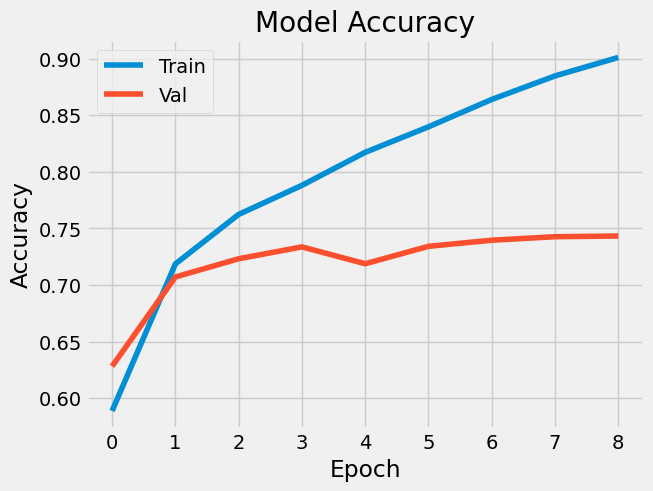

In [20]:
# Visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

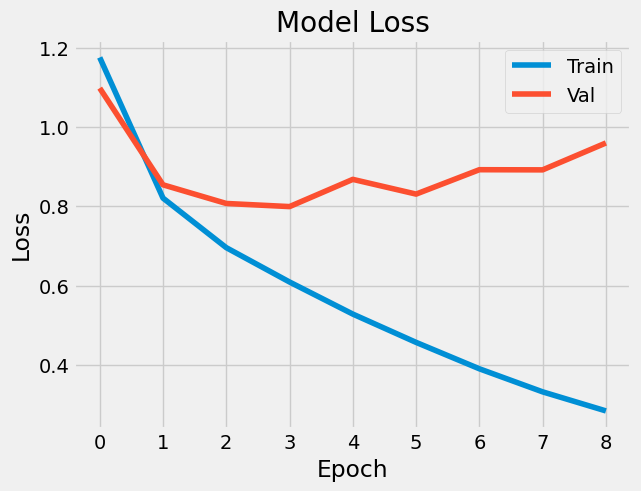

In [21]:
# Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

In [34]:
# Test the model with an example
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

Saving airplane.jpg to airplane.jpg


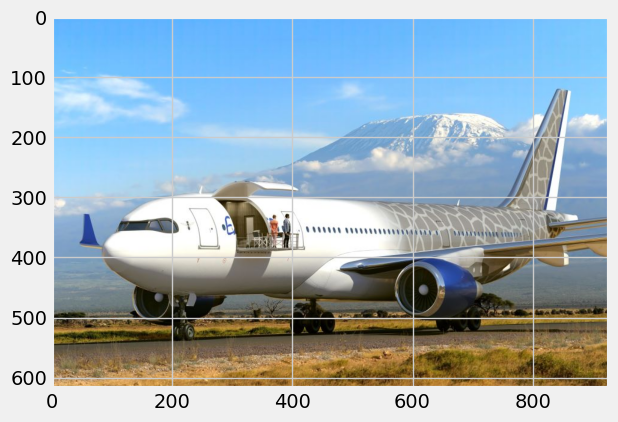

In [36]:
# show the image
new_image = plt.imread('airplane.jpg')
img = plt.imshow(new_image)

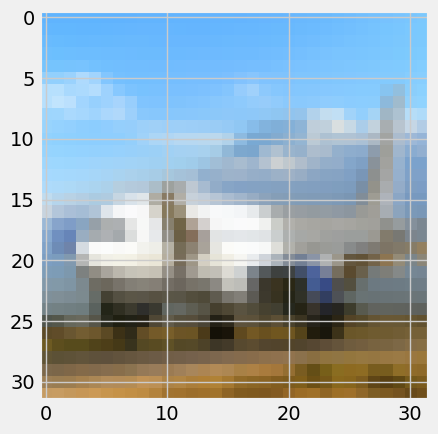

In [37]:
# Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [38]:
# Get the models prediction
predictions = model.predict(np.array([resized_image]))

# Show the predictions
predictions

1/1 [==============================] - 0s 50ms/step


array([[9.9967098e-01, 7.7934710e-06, 2.8115624e-05, 5.8210471e-06,
        1.6311236e-04, 2.9871112e-06, 5.3373418e-07, 2.6710604e-05,
        1.7619444e-05, 7.6349912e-05]], dtype=float32)

In [39]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[0, 4, 9, 2, 7, 8, 1, 3, 5, 6]


In [42]:
# print the first 2 predictions
for i in range(2):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

airplane : 99.97 %
deer : 0.02 %
